[View in Colaboratory](https://colab.research.google.com/github/sabumjung/Tensorflow/blob/master/RNN.ipynb)

In [74]:
!cd $HOME
!git clone https://github.com/jskDr/keraspp.git

fatal: destination path 'keraspp' already exists and is not an empty directory.
Cloning into 'international-airline-passengers.csv'...
fatal: repository 'https://github.com/jskDr/keraspp/blob/master/international-airline-passengers.csv/' not found


In [81]:
!ls /content/keraspp/international-airline-passengers.csv

/content/keraspp/international-airline-passengers.csv


In [0]:
!export PYTHONPATH=$HOME/keraspp/keraspp:$PYTHONPATH

In [0]:
import sys
sys.path.append("./keraspp/keraspp")
import skeras
# from skeras import load_history_history

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from keras import models, layers



In [0]:
def main():
  machine=Machine()
  machine.run(epochs=400)

In [0]:
class Machine():
    def __init__(self):
        self.data = Dataset()
        shape = self.data.X.shape[1:]
        self.model = rnn_model(shape)
        
    def run(self, epochs=400):
        d = self.data
        X_train, X_test, y_train, y_test = d.X_train, d.X_test, d.y_train, d.y_test
        X, y = d.X, d.y
        m = self.model 
        h = m.fit(X_train, y_train, epochs=epochs, validation_data=[X_test, y_test], verbose=0)

        skeras.plot_loss(h)
        plt.title('History of training')
        plt.show()

        yp = m.predict(X_test)
        print('Loss:', m.evaluate(X_test, y_test))
        plt.plot(yp, label='Origial')
        plt.plot(y_test, label='Prediction')
        plt.legend(loc=0)
        plt.title('Validation Results')
        plt.show()

        yp = m.predict(X_test).reshape(-1)
        print('Loss:', m.evaluate(X_test, y_test))  
        print(yp.shape, y_test.shape)

        df = pd.DataFrame()
        df['Sample'] = list(range(len(y_test))) * 2
        df['Normalized #Passengers'] = np.concatenate([y_test, yp], axis=0)
        df['Type'] = ['Original'] * len(y_test) + ['Prediction'] * len(yp)

        plt.figure(figsize=(7, 5))
        sns.barplot(x="Sample", y="Normalized #Passengers", 
                    hue="Type", data=df)
        plt.ylabel('Normalized #Passengers')
        plt.show()
        
        yp = m.predict(X)

        plt.plot(yp, label='Origial')
        plt.plot(y, label='Prediction')
        plt.legend(loc=0)
        plt.title('All Results')
        plt.show()


def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    m.compile('adam', 'mean_squared_error')
    
    m.summary()
    
    return m

In [0]:
def rnn_model(shape):
    m_x = layers.Input(shape=shape) #X.shape[1:]
    m_h = layers.LSTM(10)(m_x)
    m_y = layers.Dense(1)(m_h)
    m = models.Model(m_x, m_y)
    
    m.compile('adam', 'mean_squared_error')
    
    m.summary()
    
    return m


class Dataset:
    def __init__(self, fname='/content/keraspp/international-airline-passengers.csv', D=12):
        data_dn = load_data(fname=fname)
        X, y = get_Xy(data_dn, D=D)
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)  
        
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test   


def load_data(fname='/content/keraspp/international-airline-passengers.csv'): #international-airline-passengers.csv'):
    dataset = pd.read_csv(fname, usecols=[1], engine='python', skipfooter=3)
    data = dataset.values.reshape(-1)
    plt.plot(data)
    plt.xlabel('Time'); plt.ylabel('#Passengers')
    plt.title('Original Data')
    plt.show()

    # data normalize
    data_dn = (data - np.mean(data)) / np.std(data) / 5
    plt.plot(data_dn)
    plt.xlabel('Time'); plt.ylabel('Normalized #Passengers')
    plt.title('Normalized data by $E[]$ and $5\sigma$')
    plt.show()
    
    return data_dn


def get_Xy(data, D=12):
    # make X and y
    X_l = []
    y_l = []
    N = len(data)
    assert N > D, "N should be larger than D, where N is len(data)"
    for ii in range(N-D-1):
        X_l.append(data[ii:ii+D])
        y_l.append(data[ii+D])
    X = np.array(X_l)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y_l)
    print(X.shape, y.shape)
    return X, y

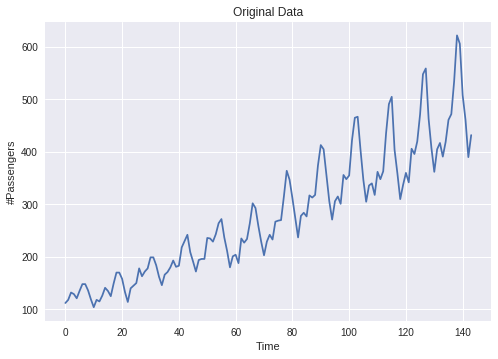

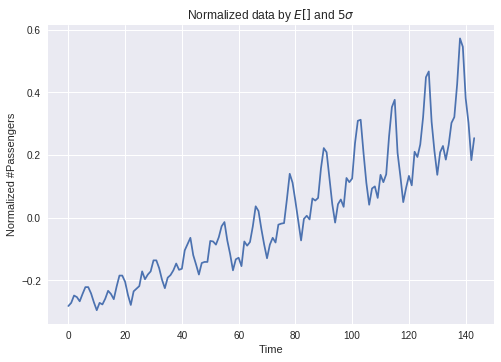

(131, 12, 1) (131,)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


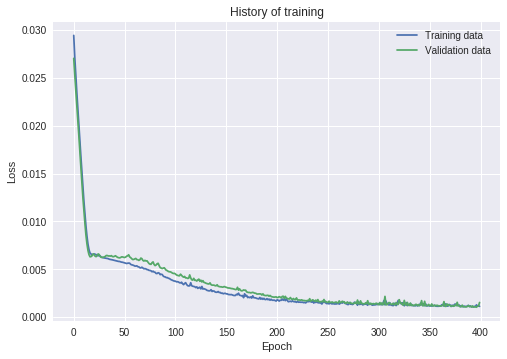

27/27 [==============================] - 0s 65us/step
Loss: 0.0015255850739777088


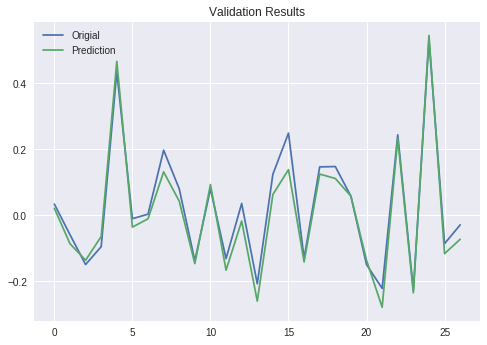

27/27 [==============================] - 0s 369us/step
Loss: 0.0015255850739777088
(27,) (27,)


NameError: ignored

In [83]:
if __name__ == '__main__':
    main()